# Bodies in Motion

In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

## Learning Goals

* Apply Newton's second law to construct mathematical models of objects in motion
* Apply nondimensionalization process and interpret dimensionless parameters
* Compute numerical solutions of systems of differential equations

## Newton's Second Law of Motion

[**Newton's second law of motion**](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion#Second_law) states that an object's motion is proprotional to the force acting on it. In other words, if an object has mass $m$ and position $\mathbf{x}(t) = (x(t),y(t),z(t))$ then

$$
m \frac{d^2 \mathbf{x}}{dt^2} = \mathbf{F}
$$

where the right hand side is the total sum of forces acting on the object. Let $\mathbf{F} = (F_x,F_y,F_z)$ be the components of the force vector and write Newton's second law as a second order, 3-dimensional system of differential equations:

$$
\begin{align*}
\frac{d^2x}{dt^2} &= \frac{F_x}{m} \\
\frac{d^2y}{dt^2} &= \frac{F_y}{m} \\
\frac{d^2z}{dt^2} &= \frac{F_z}{m}
\end{align*}
$$

## Forces

The force vector $\mathbf{F}$ in Newton's second law is built from **constitutive laws** which models the components of a system. Each constitutive law below is itself a mathematical model and has its own assumptions and constraints built in.

### Gravity

The [gravitational force](https://en.wikipedia.org/wiki/Gravity_of_Earth) experienced by an object of mass $m$ on the surface of the Earth is

$$
F_g = m g
$$

where $g$ = 9.81 m/s<sup>2</sup>.

### Spring Force

[Hooke's law](https://en.wikipedia.org/wiki/Hooke%27s_law) states that the force required to stretch/compress a spring by a distance $x$ is proportional to $x$. in other words, the spring force is

$$
F_s = kx
$$

for a spring constant $k$ with dimensions M T<sup>-2</sup>.

### Drag and Damping Forces

[Stokes law](https://en.wikipedia.org/wiki/Stokes%27_law) states that the force exerted on an object moving through a fluid is proportional to the speed of the object. In other words, the drag force equation is

$$
F_d = c v
$$

where $v$ is the speed of the object and $c$ is the drag coefficient with units M T<sup>-3</sup>.

A [damper](https://en.wikipedia.org/wiki/Dashpot) is a device that uses fluid to exert force on a moving object. Shock absorbers in bikes and cars are examples of dampers. The damping force equation is the same as the drag equation but we call $c$ the damping coefficent.

Note that drag and damping forces always act in the direction opposite to the motion of the object.

### Friction

[Friction](https://en.wikipedia.org/wiki/Friction) is the force resisting the relative motion of solid surfaces sliding against each other. The laws of friction state that the force of friction is proportional to the normal force (the force compressing two parallel surfaces together). In other words, the friction force equation is

$$
F_f = \mu F_n
$$

for a friction coefficient $\mu$ (which is dimensionless) and normal force $F_n$. Note that friction always acts in the direction opposite to the motion of the objects.

## 1D Mass Spring Damper System

Consider a mass sliding in the $x$-direction on a frictionless surface attached to a spring and damper and subject to an external force. Applying Newton's second law yields the equation

$$
m x'' = -cx' - kx + F(t)
$$

where the right hand side is the sum of forces acting in the $x$-direction. Rearranging gives the equation of motion of a mass attached to a spring and damper with an applied external force is

$$
m x'' + cx' + kx = F(t)
$$

Let's plot the solution for a sinusoidal forcing function $F(t) = \cos(\omega t)$. See [Diffy Qs Section 2.4](https://www.jirka.org/diffyqs/html/sec_mv.html) and [Diffy Qs Section 2.5](https://www.jirka.org/diffyqs/html/sec_nonhom.html) for more about mechanical vibrations.

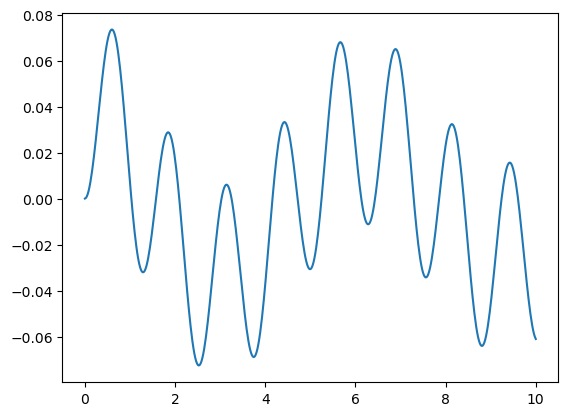

In [49]:
t = np.linspace(0,10,500)
m = 1; c = 0.1; k = 1; w = 5;
F = lambda t: np.cos(w*t)
f = lambda u,t: np.array([u[1],(F(t) - c*u[1] - k*u[0])/m])
u0 = [0,0]
u = spi.odeint(f,u0,t)

plt.plot(t,u[:,0])
plt.show()

## 1D Mass Spring Damper System with Friction

Consider a mass sliding in the $x$-direction on a surface with friction attached to a spring and damper but no external force. The normal force is $F_n = mg$ and the force of friction is

$$
F_f(x,x') = \left\{ \begin{array}{cc} -\mu mg & x' > 0 \\ \min(kx,\mu mg) & x' = 0, x > 0 \\ -\min(-kx,\mu mg) & x' = 0, x < 0 \\ \mu mg & x' < 0 \end{array} \right.
$$

applying Newton's second law yields the equation

$$
m x'' + cx' + kx = F_f(x,x')
$$

Let's plot the solution for a sinusoidal forcing function $F(t) = \cos(\omega t)$.

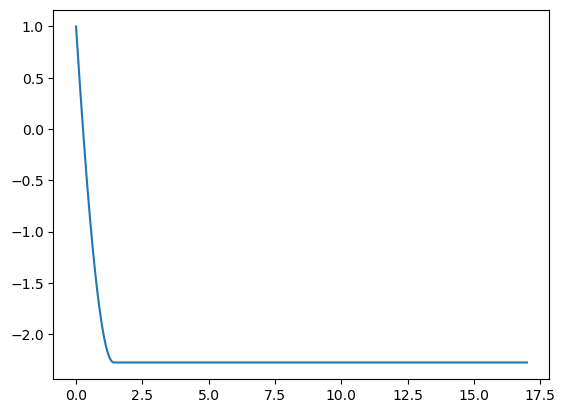

In [100]:
t = np.linspace(0,17,5000)
m = 4; c = 0.0; k = 3; w = 5; mu = 0.2; g = 9.81;
F = lambda t: np.cos(w*t)

def Ff(u):
    eps = 1e-8
    if u[1] > eps:
        return -mu*m*g
    elif u[1] < -eps:
        return mu*m*g
    elif u[0] > eps:
        return np.min([k*u[0],mu*m*g])
    elif u[0] < -eps:
        return -np.min([-k*u[0],mu*m*g])
    else:
        return 0.0

f = lambda u,t: np.array([u[1],( Ff(u) - c*u[1] - k*u[0])/m])
u0 = [1,-4]
u = spi.odeint(f,u0,t)

plt.plot(t,u[:,0])
plt.show()

## 2D Mass Spring System

**Step 1: State the problem**

A flat object slides over a flat surface. The object is attached to one end of a spring and the spring is fixed at the other end. Construct a mathematical model of the motion of the object.

**Step 2: Identify variables and parameters**

* time $t$ (independent variable)
* position $x(t)$ of the mass in $x$-direction (dependent variable)
* position $y(t)$ of the mass in $y$-direction (dependent variable)
* mass $m$
* spring constant $k$
* equilibrium length of spring $L$

**Step 3: Identify assumptions and constraints**

* no friction, drag or damping
* one end of the spring is fixed at the origin $(0,0)$ and the other end is attached to the mass a position $(x(t),y(t))$
* the mass of the spring is negligible

**Step 4: Do the math!**

The stretch/compression in the spring is the difference of the equilibrium length and the distance of the mass from origin. In other words, the stretch/compression in the spring is given by

$$
L - \| \mathbf{x}(t) \|
$$

where $\| \mathbf{x}(t) \| = \sqrt{ x(t)^2 + y(t)^2 }$. The spring force acts in the direction from the mass to the origin. The corresponding unit vector is

$$
\frac{\mathbf{x}(t)}{\| \mathbf{x}(t) \|}
$$

Therefore the spring force is given by

$$
\mathbf{F}_s = k \left( L - \| \mathbf{x}(t) \| \right) \frac{\mathbf{x}(t)}{\| \mathbf{x}(t) \|} = k \left( \frac{L}{\| \mathbf{x}(t) \|} - 1 \right) \mathbf{x}(t)
$$

Apply Newton's second law of motion:

$$
\begin{align*}
m \frac{d^2x}{dt^2} &= \frac{k L x}{\sqrt{ x^2 + y^2 }} - k x \\
m \frac{d^2y}{dt^2} &= \frac{k L y}{\sqrt{ x^2 + y^2 }} - k y
\end{align*}
$$

Apply the nondimensionalization procedure. Let $x = [x]x^*$, $y = [y]y^*$ and $t = [t]t^*$. We should choose $[x] = [y]$ since there is no reason to treat the two directions differently and so let $[c] = [x] = [y]$. Make the substitutions:

$$
\begin{align*}
\frac{m[c]}{[t]^2} \frac{d^2 x^*}{dt^{*2}} &= \frac{k L [c]x^*}{[c] \sqrt{ x^{*2} + y^{*2} }} - k [c] x^* \\
\frac{m[c]}{[t]^2} \frac{d^2 y^*}{dt^{*2}} &= \frac{k L [c]y^*}{[c] \sqrt{ x^{*2} + y^{*2} }} - k [c] y^*
\end{align*}
$$

Divide by the highest order coefficient $m[c]/[t]^2$ to find:

$$
\begin{align*}
\frac{d^2 x^*}{dt^{*2}} &= \frac{k L [t]^2 x^*}{ m [c] \sqrt{ x^{*2} + y^{*2} }} - \frac{k [t]^2 x^*}{m} \\
\frac{d^2 y^*}{dt^{*2}} &= \frac{k L [t]^2 y^*}{ m [c] \sqrt{ x^{*2} + y^{*2} }} - \frac{k [t]^2 y^*}{m} \\
\end{align*}
$$

Choose scaling factors

$$
[t] = \sqrt{\frac{m}{k}} \hspace{20mm} [c] = L
$$

and find

$$
\begin{align*}
\frac{d^2 x^*}{dt^{*2}} &= \frac{x^*}{ \sqrt{ x^{*2} + y^{*2} }} - x^* \\
\frac{d^2 y^*}{dt^{*2}} &= \frac{y^*}{ \sqrt{ x^{*2} + y^{*2} }} - y^*
\end{align*}
$$

**Step 5: Analyze the model**

Introduce new variables

$$
u_0 = x^* \ , \ \ u_1 = \frac{dx^*}{dt^*} \ , \ \ u_2 = y^* \ , \ \ u_3 = \frac{dy^*}{dt^*}
$$

and write the system as a first order system of equation

\begin{align*}
u_0' &= u_1 \\
u_1' &= \frac{u_0}{ \sqrt{ u_0^2 + u_2^2 }} - u_0 \\
u_2' &= u_3 \\
u_3' &= \frac{u_2}{ \sqrt{ u_0^2 + u_2^2 }} - u_2
\end{align*}

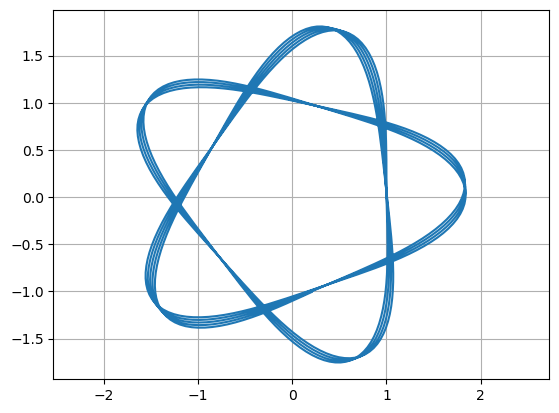

In [5]:
def f(u,t):
    dudt = np.array([0.,0.,0.,0.])
    D = np.sqrt(u[0]**2 + u[2]**2)
    dudt[0] = u[1]
    dudt[1] = u[0]/D - u[0]
    dudt[2] = u[3]
    dudt[3] = u[2]/D - u[2]
    return dudt

u0 = [1.,0.,0.,1.]
t = np.linspace(0,100,1000)
U = spi.odeint(f,u0,t)
plt.plot(U[:,0],U[:,2])
plt.grid(True), plt.axis('equal')
plt.show()

## Simple Pendulum

**Step 1: State the problem**

A pendulum is a mass attached to one end of a rod which is fixed at the other end and swings about the fixed end under the force of gravity. How does the pendulum swing over time based on initial position and velocity?

**Step 2: Identify variables and parameters**

* angle of the pendulum $\theta$ (dependent variable)
* time $t$ (independent variable)
* length of rod $L$ (parameter)
* mass of the object $m$ (parameter)
* constant of gravity $g$ (paramter)

**Step 3: Identify constraints and assumptions**

* No drag force
* A point mass
* Rod has no mass and no drag

**Step 4: Do the math!**

Since $x = L \sin \theta $ and $y = - L \cos \theta$ we have

$$
x'' = - \theta'' L \sin \theta \hspace{20mm}
y'' = \theta'' L \cos \theta
$$

Apply Newton's seoncd law we find

\begin{align*}
m x'' &= -F \sin \theta \\
m y'' &= F \cos \theta - mg \\
\end{align*}

therefore

\begin{align*}
m \theta'' L &= F \\
m \theta'' L &= F - \frac{mg}{\cos \theta} \\
\end{align*}

$$
\ddot{ \theta } + \frac{g}{L} \sin \theta = 0
$$

**Step 5: Analyze the model**